In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Grabbing the data from the source
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

#Creating a dataframe
df = pd.read_csv(url, names=names)

In [2]:
#Checking the head of the dataframe
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
#checking the shape of the dataframe
df.shape

(699, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
#Dropping the id column since it is of no use for our prediction
df.drop('id', axis =1, inplace = True)

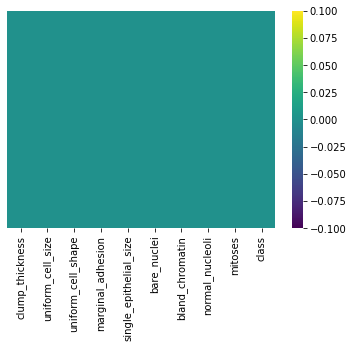

In [11]:
#Creating a heatmap to find any missing values
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

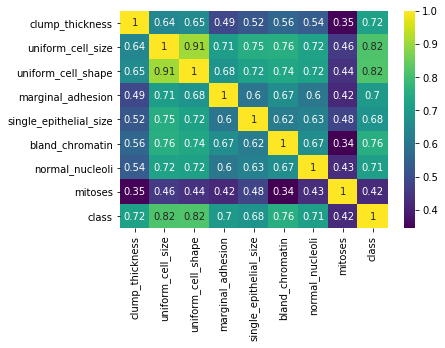

In [12]:
#Creating a correlation heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

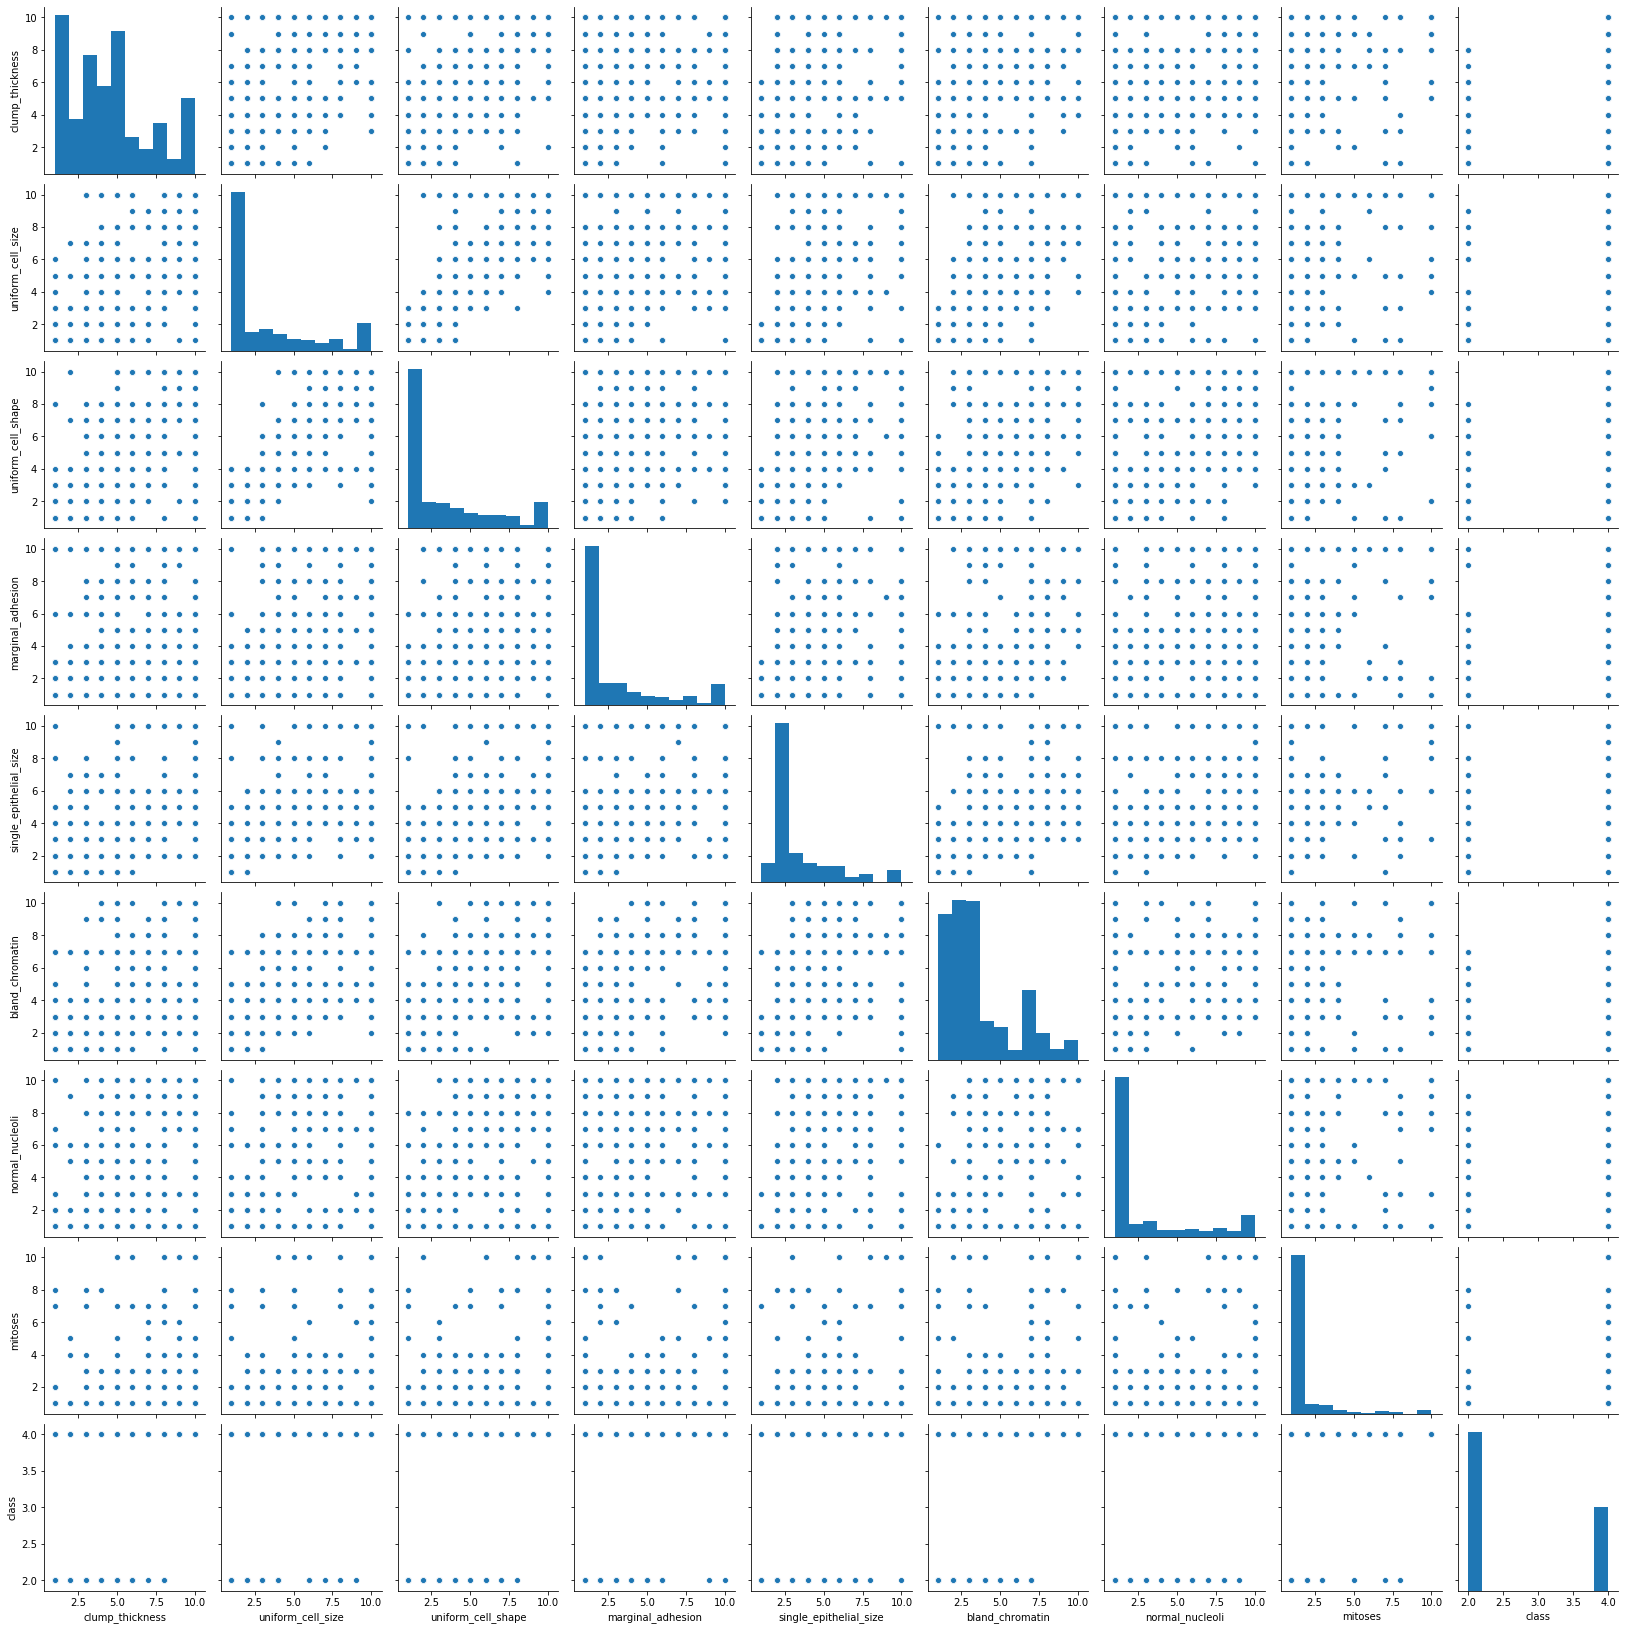

In [18]:
#Creating some exploratory data analysis visualizations
sns.pairplot(df)

In [20]:
#Checking the number of unique values for all the columns. The metadata of this dataset explains that there should be 10 unique values for each attribute\n",
#and unavailable values or missing values have been replaced with '?'
df.nunique()

clump_thickness           10
uniform_cell_size         10
uniform_cell_shape        10
marginal_adhesion         10
single_epithelial_size    10
bare_nuclei               11
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
dtype: int64

In [24]:
#Percentage of rows with unavailable/missing values
percent_missing = (df == '?').astype(int).sum(axis=0)* 100/ len(df)
print(percent_missing)

clump_thickness           0.000000
uniform_cell_size         0.000000
uniform_cell_shape        0.000000
marginal_adhesion         0.000000
single_epithelial_size    0.000000
bare_nuclei               2.288984
bland_chromatin           0.000000
normal_nucleoli           0.000000
mitoses                   0.000000
class                     0.000000
dtype: float64


/Users/siddharthnatu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [25]:
#Since 2.2% isn't a huge percent of the dataset, we can simply drop these rows
df = df[df.bare_nuclei != '?']

In [26]:
#Defining the features and target variables
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [27]:
#Splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
#Using Support Vector Machine classification algorithm
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        96
           4       0.91      1.00      0.95        41

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

[[92  4]
 [ 0 41]]


Text(0.5, 1.0, 'Error Rate vs K Value')

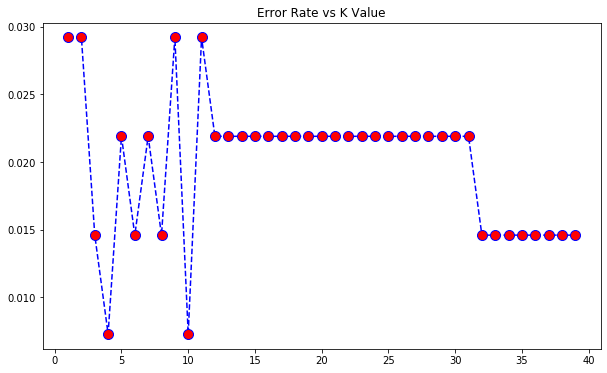

In [30]:
#Using KNN classification with a range of n_neighbors values to check for the least error rate 

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')







In [33]:
#Choosing n_neighbors values with least error - 4 and 10 here.
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("KNN with n_neighbors = 4\n")
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print("\n")

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("KNN with n_neighbors = 10\n")
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

KNN with n_neighbors = 4

              precision    recall  f1-score   support

           2       1.00      0.99      0.99        96
           4       0.98      1.00      0.99        41

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[95  1]
 [ 0 41]]


KNN with n_neighbors = 10

              precision    recall  f1-score   support

           2       0.99      1.00      0.99        96
           4       1.00      0.98      0.99        41

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[96  0]
 [ 1 40]]


In [34]:
#Using Random Forest classifier to see how it performs
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99        96
           4       1.00      0.98      0.99        41

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[96  0]
 [ 1 40]]
